In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
departamentos = ["AMAZONAS", "ANCASH", "APURIMAC", "AREQUIPA", "AYACUCHO", "CAJAMARCA", 
    "CALLAO", "CUSCO", "HUANCAVELICA", "HUANUCO", "ICA", "JUNIN", "LA%20LIBERTAD", "LAMBAYEQUE", 
    "LIMA%20DIRIS%20CENTRO", "LIMA%20DIRIS%20ESTE", "LIMA%20DIRIS%20NORTE", "LIMA%20DIRIS%20SUR", "LIMA", "LORETO",
     "MADRE%20DE%20DIOS", "MOQUEGUA", "PASCO", "PIURA", "PUNO", "SAN%20MARTIN", "TACNA", "TUMBES", "UCAYALI"]

url_base = "https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20"

departamentos = departamentos[:2]

dfset = []
for dep in departamentos:
    url = url_base + dep + ".csv"
    d = pd.read_csv(url, encoding='latin-1')
    dataset.append(d)


In [54]:
# merge all the dataframes of dataset into one
df = pd.concat(dataset)
df = df.reset_index(drop=True)
df.head()

,ï»¿Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,...,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD,HBC,Dx_Anemia
0,AMAZONAS,CHACHAPOYAS,JUMBILLA,I-1 - 00004926 - RECTA,4926,11/13/2019,M,11/13/2017,24,10308.0,...,1,0,0,0,AMAZONAS,BONGARA,RECTA,1950,11.494917,Normal
1,AMAZONAS,CHACHAPOYAS,LAMUD,I-1 - 00004852 - SAN CRISTOBAL DE OLTO,4852,4/4/2019,F,5/30/2014,59,10516.0,...,0,0,0,0,AMAZONAS,LUYA,SAN CRISTOBAL,2000,10.952880,Anemia Leve
2,AMAZONAS,CHACHAPOYAS,LAMUD,I-1 - 00004852 - SAN CRISTOBAL DE OLTO,4852,4/4/2019,M,6/23/2014,58,10516.0,...,0,0,0,0,AMAZONAS,LUYA,SAN CRISTOBAL,2000,12.452880,Normal
3,AMAZONAS,CHACHAPOYAS,LEYMEBAMBA,I-1 - 00007067 - LA MORADA,7067,4/1/2019,M,10/1/2014,54,10106.0,...,1,1,0,0,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,3450,10.512719,Anemia Leve
4,AMAZONAS,CHACHAPOYAS,LEYMEBAMBA,I-1 - 00007067 - LA MORADA,7067,12/10/2019,M,12/10/2015,48,10106.0,...,1,1,0,0,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,3450,9.412719,Anemia Moderada


In [55]:
df.columns

Index(['ï»¿Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'FechaAtencion',
       'Sexo', 'FechaNacimiento', 'EdadMeses', 'UbigeoPN', 'DepartamentoPN',
       'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'FechaHemoglobina', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

In [10]:
# df = pd.read_csv("https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20AREQUIPA.csv")
# df.head()

In [56]:
df = df[['Sexo', 'Qaliwarma', 'Peso', 'Cred', 'Juntos', 'Talla', 'Hemoglobina', 'ALTITUD', 'Dx_Anemia']]
df.head()

,Sexo,Qaliwarma,Peso,Cred,Juntos,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,M,0,11.36,1,1,89.3,12.2,1950,Normal
1,F,1,,0,0,,11.7,2000,Anemia Leve
2,M,1,,0,1,,13.2,2000,Normal
3,M,1,19.9,1,1,106,13.0,3450,Anemia Leve
4,M,0,15.1,1,1,96,11.9,3450,Anemia Moderada


In [57]:
print(df['Sexo'].mode())

df['Sexo'] = df['Sexo'].replace(np.nan, 'M')
l = []
for i in df['Sexo']:
  l.append(i)
print(list(set(l)))

df['Sexo'] = df['Sexo'].map( {'F': 1, 'M': 0} ).astype(int)
print(df.head())

0    M
Name: Sexo, dtype: object
['M', 'F']
   Sexo  Qaliwarma   Peso  Cred  Juntos Talla  Hemoglobina  ALTITUD  \
0     0          0  11.36     1       1  89.3         12.2     1950   
1     1          1            0       0               11.7     2000   
2     0          1            0       1               13.2     2000   
3     0          1   19.9     1       1   106         13.0     3450   
4     0          0   15.1     1       1    96         11.9     3450   

         Dx_Anemia  
0           Normal  
1      Anemia Leve  
2           Normal  
3      Anemia Leve  
4  Anemia Moderada  


In [58]:
a = df['Dx_Anemia']
dx = []
for i in a:
  dx.append(i)
dx = list(set(dx))

dx

['Anemia Moderada', 'Anemia Leve', 'Normal', 'Anemia Severa']

In [59]:
df['Peso'] = df['Peso'].replace(' ', 'nan').astype('float32')
df['Talla'] = df['Talla'].replace(' ', 'nan').astype('float32')
df['Peso'] = df['Peso'].fillna(df['Peso'].mean())
df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Dx_Anemia'] = df['Dx_Anemia'].map({'Normal': 0, 'Anemia Leve': 1, 'Anemia Moderada': 2, 'Anemia Severa': 3, np.nan: df['Dx_Anemia'].mode()}) 

df.head()

,Sexo,Qaliwarma,Peso,Cred,Juntos,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,0,0,11.360000,1,1,89.300003,12.2,1950,0
1,1,1,13.052127,0,0,83.136734,11.7,2000,1
2,0,1,13.052127,0,1,83.136734,13.2,2000,0
3,0,1,19.900000,1,1,106.000000,13.0,3450,1
4,0,0,15.100000,1,1,96.000000,11.9,3450,2


In [60]:
for c in df:
  df[c] = df[c].fillna(df[c].mean())

# Matriz de Correlación

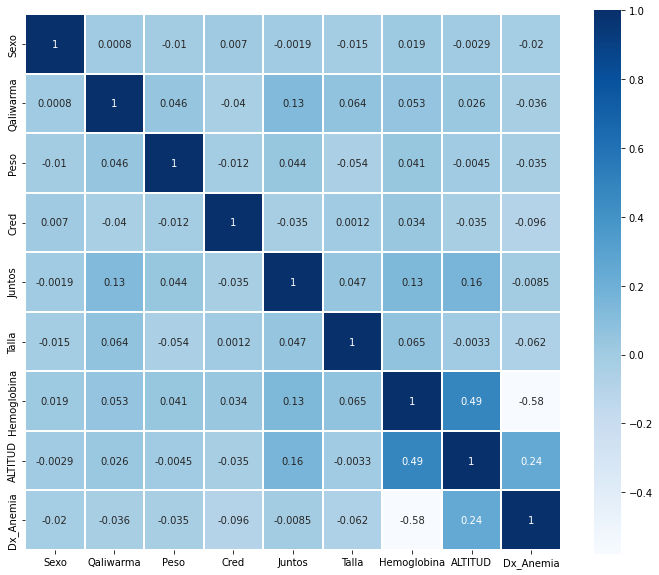

,Sexo,Qaliwarma,Peso,Cred,Juntos,Talla,Hemoglobina,ALTITUD,Dx_Anemia
0,0.0,0.0,11.360000,1.0,1.0,89.300003,12.20,1950.0,0.0
1,1.0,1.0,13.052127,0.0,0.0,83.136734,11.70,2000.0,1.0
2,0.0,1.0,13.052127,0.0,1.0,83.136734,13.20,2000.0,0.0
3,0.0,1.0,19.900000,1.0,1.0,106.000000,13.00,3450.0,1.0
4,0.0,0.0,15.100000,1.0,1.0,96.000000,11.90,3450.0,2.0
...,...,...,...,...,...,...,...,...,...
118882,1.0,0.0,13.052127,0.0,0.0,83.136734,9.90,39.0,2.0
118883,1.0,0.0,8.400000,0.0,0.0,64.000000,12.21,1377.0,0.0
118884,1.0,0.0,8.000000,0.0,0.0,67.000000,14.00,2538.0,0.0
118885,1.0,0.0,8.060000,1.0,0.0,67.300003,10.70,4.0,1.0


In [61]:
matriz = df.copy()
matriz.loc['Dx_Anemia'] = matriz['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})
plt.figure(figsize=(12, 10))
corr = matriz.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show()
matriz

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df[['Dx_Anemia']]
X = df.drop('Dx_Anemia', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [63]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
# # Fit the model
linear_model.fit(X_train, y_train)
line_y_linear = linear_model.predict(X_test)

In [64]:
linear_test_pred = linear_model.predict(X_test)
linear_train_pred = linear_model.predict(X_train)

<AxesSubplot:xlabel='Dx_Anemia'>

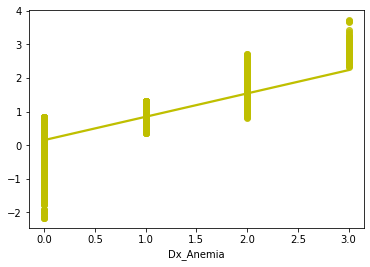

In [65]:
sns.regplot(x=y_test, y=line_y_linear, ci=None, color="y", scatter=True)

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.predict(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
labels = pd.Series(kmeans.labels_, name="class")
X.join(labels)

[2 2 2 ... 3 2 1]
[[4.90675084e-01 3.97448152e-02 1.31000142e+01 3.39097962e-01
  3.10756441e-01 8.29315262e+01 1.29404712e+01 3.15037564e+03]
 [4.93592667e-01 2.86163809e-02 1.31708436e+01 4.01450201e-01
  1.62965159e-01 8.30654460e+01 1.14469760e+01 2.47186360e+02]
 [4.88776978e-01 4.16786571e-02 1.27545054e+01 4.94628297e-01
  2.03597122e-01 8.32153364e+01 1.25205962e+01 2.36574192e+03]
 [4.94724247e-01 2.42575873e-02 1.29264525e+01 5.47046666e-01
  3.04579571e-01 8.43027479e+01 1.20900261e+01 1.24380768e+03]]


,Sexo,Qaliwarma,Peso,Cred,Juntos,Talla,Hemoglobina,ALTITUD,class
0,0,0,11.360000,1,1,89.300003,12.20,1950,2
1,1,1,13.052127,0,0,83.136734,11.70,2000,2
2,0,1,13.052127,0,1,83.136734,13.20,2000,2
3,0,1,19.900000,1,1,106.000000,13.00,3450,0
4,0,0,15.100000,1,1,96.000000,11.90,3450,0
...,...,...,...,...,...,...,...,...,...
118881,0,0,7.500000,0,0,65.000000,11.50,2765,0
118882,1,0,13.052127,0,0,83.136734,9.90,39,1
118883,1,0,8.400000,0,0,64.000000,12.21,1377,3
118884,1,0,8.000000,0,0,67.000000,14.00,2538,2


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


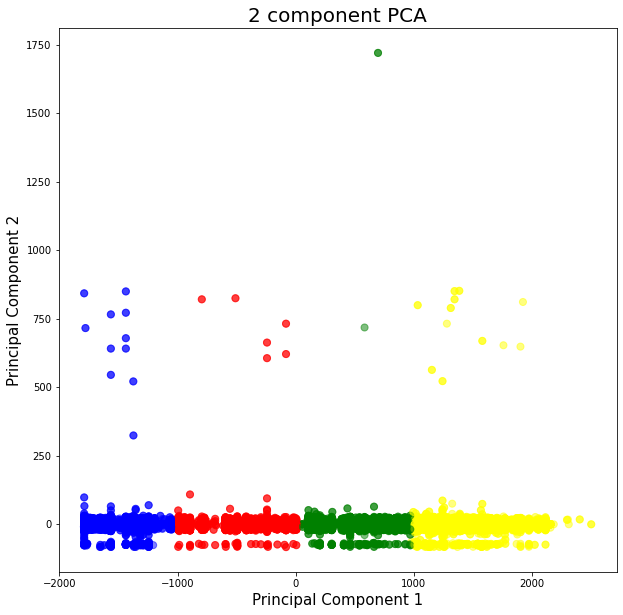

In [67]:
from sklearn.decomposition import PCA

numClusters= 4
kmeans = KMeans(n_clusters=numClusters).fit(X)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

#transform n variiables to 2 principal components to plot
pca = PCA(n_components=2)
pca_fit = pca.fit(X)
principalComponents = pca_fit.transform(X)
principalDf = pd.DataFrame(data = principalComponents
         , columns = ['principal component 1', 'principal component 2'])

colors =['red','green','blue','yellow']
centroidColor= []
for item in range(numClusters):
  centroidColor.append(colors[item])

dataPointColor=[]
for row in labels:
  dataPointColor.append(colors[row])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
c=dataPointColor, s=50, alpha=0.5)

C_transformed = pca_fit.transform(C)
plt.scatter(C_transformed[:, 0], C_transformed[:, 1], c=centroidColor, s=200, marker=('x'))
plt.show()

# Qaliwarma affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\2442303897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


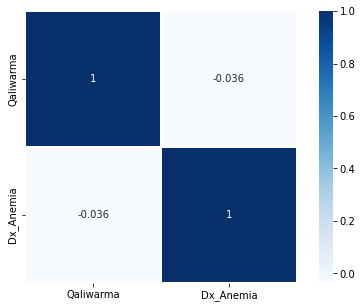

In [68]:
QW_data = df[['Qaliwarma', 'Dx_Anemia']]
QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = QW_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

# CRED affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\3081099521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


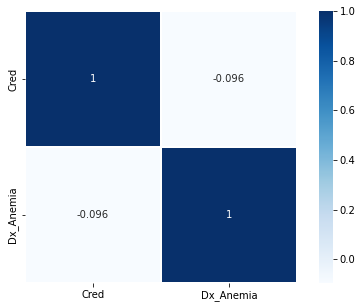

In [70]:
Cred_data = df[['Cred', 'Dx_Anemia']]
Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Cred_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

# Juntos affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_14140\3147606408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


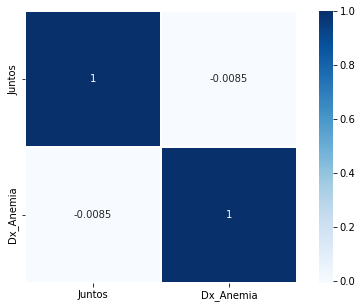

In [71]:
Juntos_data = df[['Juntos', 'Dx_Anemia']]
Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Juntos_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 